# Machine Learning Activity 3

In [1]:
%load_ext oct2py.ipython

## Logistic Regression

In [2]:
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Logistic_regression', width='100%', height=540)

## Load and Plot the data

Test 1     Test 2    label
ans =

        55.5        69.5           1
          41        81.5           1
        53.5          86           1
          46          84           1
          41        73.5           1
        51.5          69           1
          51        62.5           1
          42          75           1
        53.5          83           1
        57.5          71           1
        42.5        72.5           1
          41          80           1
          46          82           1
          46        60.5           1
        49.5          76           1
          41          76           1
        48.5        72.5           1
        51.5        82.5           1
        44.5        70.5           1
          44          66           1
          33        76.5           1
        33.5        78.5           1
        31.5          72           1
          33        81.5           1
          42        59.5           1
          30          64           1
    

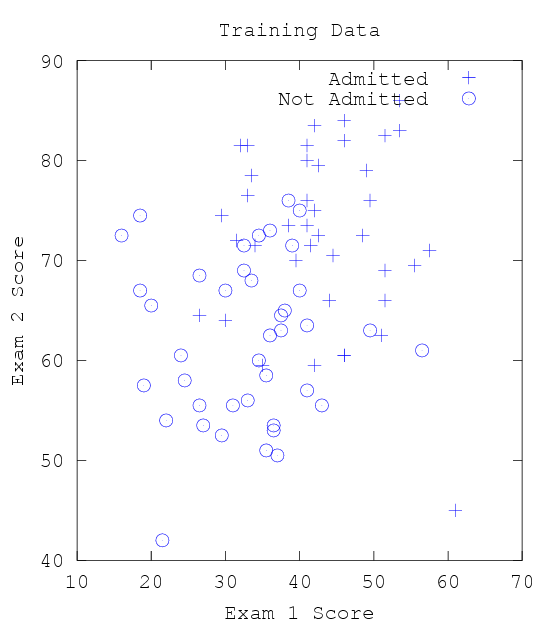

In [18]:
%%octave  

x = load('ml3x.dat');
y = load('ml3y.dat');
printf("         Test 1     Test 2    label\n")
format short g
[x y]

pass = find(y == 1); 
fail = find(y == 0);

plot(x(pass, 1), x(pass,2), '+')
hold on
plot(x(fail, 1), x(fail, 2), 'o')
hold on

xlabel('Exam 1 Score')
ylabel('Exam 2 Score')
title('Training Data')
legend('Admitted', 'Not Admitted')

## Hypothesis: Sigmoid or Logistic Function

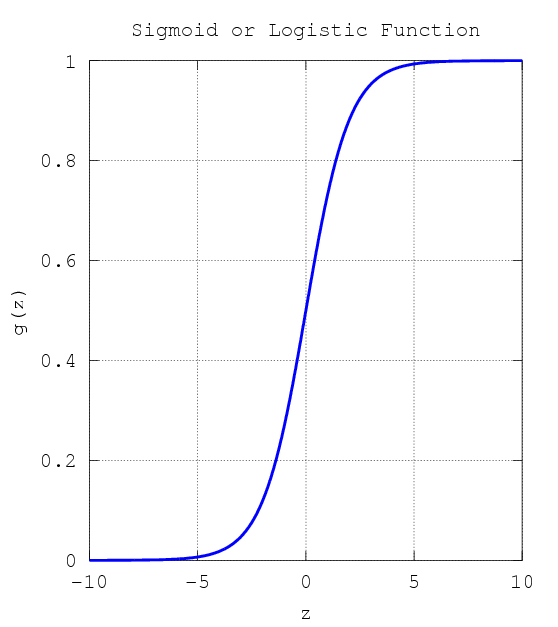

In [17]:
%%octave

g = inline('1.0 ./ (1.0 + exp(-z))');
z = linspace(-10,10,1000);
plot(z,g(z),'linewidth',5);
xlabel('z');
ylabel('g(z)');
title('Sigmoid or Logistic Function');
grid on;

## Newton's Method and the Cost Function

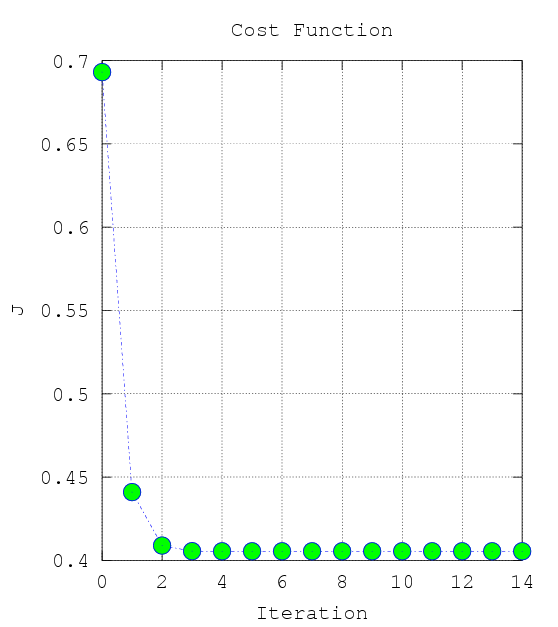

In [23]:
%%octave  

x = load('ml3x.dat');
y = load('ml3y.dat');

pass = find(y == 1); 
fail = find(y == 0);

[m, n] = size(x);      % m - no. of training data; n - no. of features 

x = [ones(m, 1), x];   % Append ones for notation convenience

theta = zeros(n+1, 1); % n + 1 - no. of features + 1 (from the previous append)

g = inline('1.0 ./ (1.0 + exp(-z))');  % Sigmoid

MAX_ITERATION = 15;

J = zeros(MAX_ITERATION, 1);

for i = 1:MAX_ITERATION
 
    z = x * theta;   % Inner product, theta' * x
    
    h = g(z);        % Hypothesis
    
    gradient = (1/m).*x' * (h-y); 
    
    H = (1/m).*x' * diag(h) * diag(1-h) * x;
    
    J(i) =(1/m)*sum(-y.*log(h) - (1-y).*log(1-h)); % Cost Function
    
    theta = theta - H\gradient;
end
 
plot(0:MAX_ITERATION-1, J, 'o-.', 'MarkerFaceColor', 'g', 'MarkerSize', 8)
xlabel('Iteration'); 
ylabel('J');
title('Cost Function');
grid on

From this plot, you can infer that Newton's Method has converged at around 4 - 7 iterations. 

## Cost Drop per Iteration

In [41]:
%%octave  

x = load('ml3x.dat');
y = load('ml3y.dat');

pass = find(y == 1); 
fail = find(y == 0);

[m, n] = size(x);      % m - no. of training data; n - no. of features 

x = [ones(m, 1), x];   % Append ones for notation convenience

theta = zeros(n+1, 1); % n + 1 - no. of features + 1 (from the previous append)

g = inline('1.0 ./ (1.0 + exp(-z))');  % Sigmoid

MAX_ITERATION = 6;

J = zeros(MAX_ITERATION, 1);

for i = 1:MAX_ITERATION
 
    z = x * theta;   % Inner product, theta' * x
    
    h = g(z);        % Hypothesis
    
    gradient = (1/m).*x' * (h-y); 
    
    H = (1/m).*x' * diag(h) * diag(1-h) * x;
    
    J(i) =(1/m)*sum(-y.*log(h) - (1-y).*log(1-h)); % Cost Function
    
    theta = theta - H\gradient;
end
 
theta
cost_drop = J(2:MAX_ITERATION)-J(1:MAX_ITERATION-1)

theta =

     -16.379
     0.14834
     0.15891

cost_drop =

    -0.25221
    -0.03205
  -0.0033809
  -6.3322e-05
  -2.8988e-08

Thus, the convergence is the 5th iteration with a cost drop of about -2.8988e-08.

## Final Hypothesis Plot

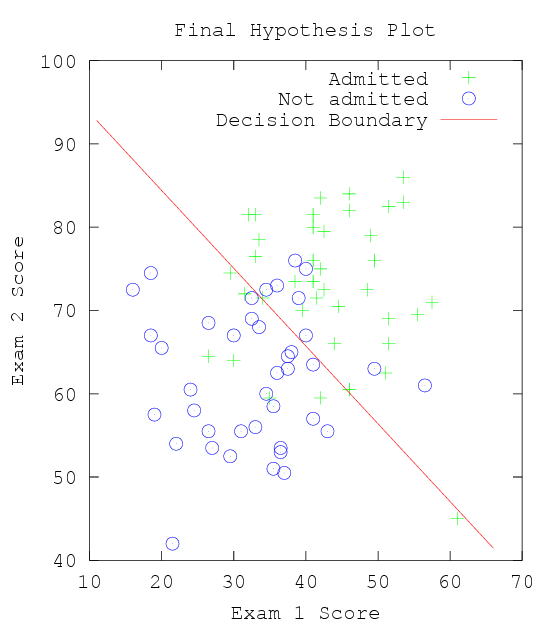

In [48]:
%%octave  

x = load('ml3x.dat');
y = load('ml3y.dat');

pass = find(y == 1); 
fail = find(y == 0);


plot(x(pass, 1), x(pass,2), 'g+')
hold on
plot(x(fail, 1), x(fail, 2), 'bo')
 

[m, n] = size(x);      % m - no. of training data; n - no. of features 

x = [ones(m, 1), x];   % Append ones for notation convenience

theta = zeros(n+1, 1); % n + 1 - no. of features + 1 (from the previous append)

g = inline('1.0 ./ (1.0 + exp(-z))');  % Sigmoid

MAX_ITERATION = 6;

J = zeros(MAX_ITERATION, 1);

for i = 1:MAX_ITERATION
 
    z = x * theta;   % Inner product, theta' * x
    
    h = g(z);        % Hypothesis
    
    gradient = (1/m).*x' * (h-y); 
    
    H = (1/m).*x' * diag(h) * diag(1-h) * x;
    
    J(i) =(1/m)*sum(-y.*log(h) - (1-y).*log(1-h)); % Cost Function
    
    theta = theta - H\gradient;
end

x1_range = [min(x(:,2))-5,  max(x(:,2))+5];                % +- 5 arbitrary allowance for the plot
x2_values = (-1./theta(3)).*(theta(2).*x1_range + theta(1));   % from theta' * x = 0
                                                         % theta_0 + theta_1*x_1 + theta_2*x_2 = 0
                                                         % Solving for x_2
                                                         % x_2 = (-1/theta_2).*(theta_0 + theta_1*x_1)


plot(x1_range, x2_values,'r-')
xlabel('Exam 1 Score')
ylabel('Exam 2 Score')
title('Final Hypothesis Plot')
legend('Admitted', 'Not admitted', 'Decision Boundary')

## Prediction

What is the probability that a student with a score of 20 on Exam 1 and a score of 80 on Exam 2 will not be admitted?

In [42]:
%%octave  

x = load('ml3x.dat');
y = load('ml3y.dat');

pass = find(y == 1); 
fail = find(y == 0);

[m, n] = size(x);      % m - no. of training data; n - no. of features 

x = [ones(m, 1), x];   % Append ones for notation convenience

theta = zeros(n+1, 1); % n + 1 - no. of features + 1 (from the previous append)

g = inline('1.0 ./ (1.0 + exp(-z))');  % Sigmoid

MAX_ITERATION = 6;

J = zeros(MAX_ITERATION, 1);

for i = 1:MAX_ITERATION
 
    z = x * theta;   % Inner product, theta' * x
    
    h = g(z);        % Hypothesis
    
    gradient = (1/m).*x' * (h-y); 
    
    H = (1/m).*x' * diag(h) * diag(1-h) * x;
    
    J(i) =(1/m)*sum(-y.*log(h) - (1-y).*log(1-h)); % Cost Function
    
    theta = theta - H\gradient;
end

probability = 1 - g([1, 20, 80]*theta)

probability =    0.66802

-- based on Andrew Ng's Machine Learning Course

-- mkc